In [1]:
# initial imports
import sys
sys.path.append("../")
from hand_tracking.hand_tracker import HandTracker
from model import reduced_procrustes as gesture_similarity_score

import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

In [2]:
# defining out hand tracker
# it detects hand in the image and returns its landmarks

palm_model_path = "../hand_tracking/models/palm_detection.tflite"
landmark_model_path = "../hand_tracking/models/hand_landmark.tflite"
anchors_path = "../hand_tracking/data/anchors.csv" 

# box_shift determines 
detector = HandTracker(palm_model_path, landmark_model_path, anchors_path,
                       box_shift=0.2, box_enlarge=1.3)

# gesture comparision threshold
threshold = 0.1

In [3]:
# some functions for not repeating myself

def draw_landmarks(img, landmark, box):
    f,ax = plt.subplots(1,1, figsize=(10, 10*img.shape[0]/img.shape[1]))
    ax.imshow(img)
    ax.scatter(landmark[:, 0], landmark[:, 1])
    ax.add_patch(Polygon(box, color="#00ff00", fill=False))
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False);
    

Now we are going to define a base gesture which could be assumed as the user's lock gesture.

../hand_tracking/hand_tracker.py:95: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x) )


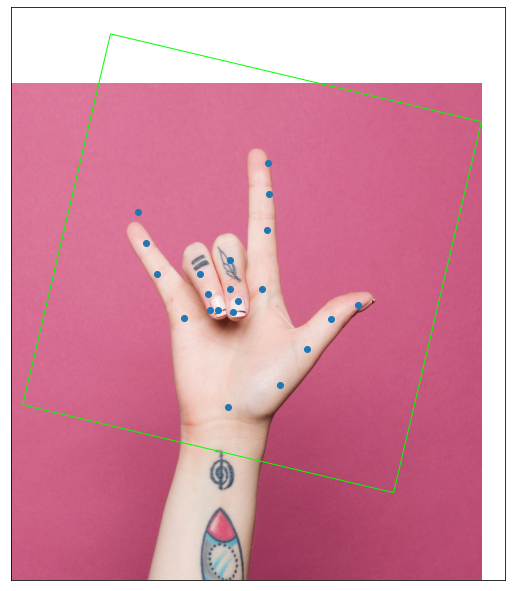

In [4]:
# defining landmarks of lock gesture
base_img = cv.imread('sample_images/rock_2.jpg')[:,:,::-1]
base_landmark, base_box = detector(base_img)

draw_landmarks(base_img, base_landmark, base_box)

### Different Size Test

In this test you could see the thumb of the baby is slightly close but still the prediction is close to our threshold value, we could easily change how strictly our model compares the gestures just by changing the threshold value

Similarity Score (with reflection): 0.11284926166881293 --> different gesture
Similarity Score (without reflection): 0.11284926166881293 --> different gesture


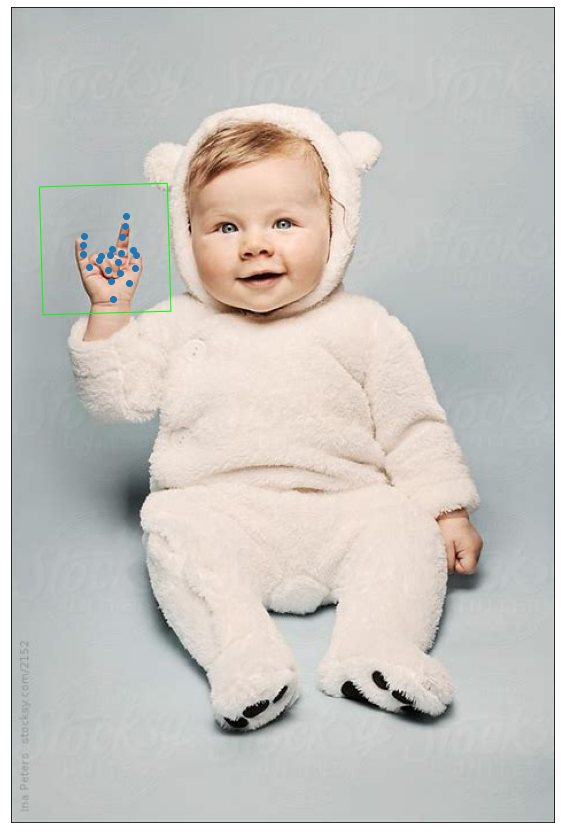

In [5]:
# testing the score of other images to our base image
img = cv.imread('sample_images/rock_6.jpg')[:,:,::-1]
landmark, box = detector(img)

score = gesture_similarity_score(base_landmark, landmark)
print(f"Similarity Score (with reflection): {score} --> {'Same' if score <= threshold else 'different'} gesture")

score_ref = gesture_similarity_score(base_landmark, landmark, reflection=False)
print(f"Similarity Score (without reflection): {score_ref} --> {'Same' if score_ref <= threshold else 'different'} gesture")

draw_landmarks(img, landmark, box)

### Different Reflection (Mirror) Image Test

Here the gesture is right but the hand is turned around showing back of the hand towards our module

Similarity Score (with reflection): 0.025939964568959972 --> Same gesture
Similarity Score (without reflection): 0.975185944765544 --> different gesture


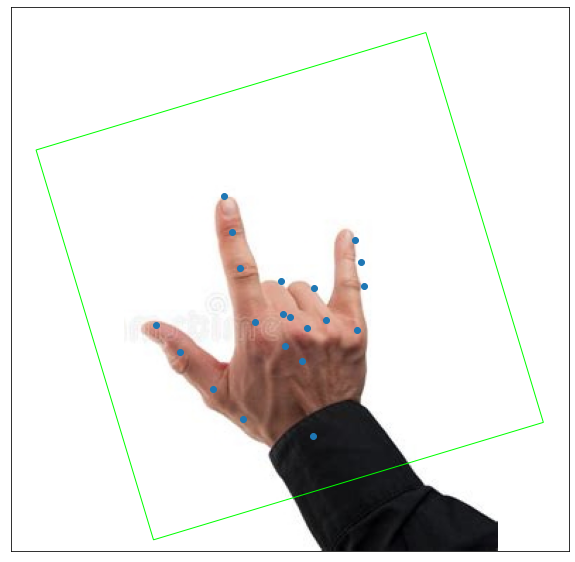

In [6]:
img = cv.imread('sample_images/rock_4.jpg')[:,:,::-1]
landmark, box = detector(img)

score = gesture_similarity_score(base_landmark, landmark)
print(f"Similarity Score (with reflection): {score} --> {'Same' if score <= threshold else 'different'} gesture")

score_ref = gesture_similarity_score(base_landmark, landmark, reflection=False)
print(f"Similarity Score (without reflection): {score_ref} --> {'Same' if score_ref <= threshold else 'different'} gesture")

draw_landmarks(img, landmark, box)

### Combined Test

Here the image is larger in size with smaller gesture, slightly tilted hand and mirror imaged gesture.

Similarity Score (with reflection): 0.09955525960531086 --> Same gesture
Similarity Score (without reflection): 0.9709729232328738 --> different gesture


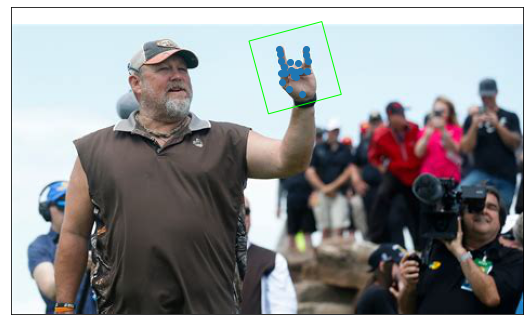

In [7]:
img = cv.imread('sample_images/rock_5.jpg')[:,:,::-1]
landmark, box = detector(img)

score = gesture_similarity_score(base_landmark, landmark)
print(f"Similarity Score (with reflection): {score} --> {'Same' if score <= threshold else 'different'} gesture")

score_ref = gesture_similarity_score(base_landmark, landmark, reflection=False)
print(f"Similarity Score (without reflection): {score_ref} --> {'Same' if score_ref <= threshold else 'different'} gesture")

draw_landmarks(img, landmark, box)